In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log as lg

In [2]:
!git clone https://github.com/CSSEGISandData/COVID-19

fatal: destination path 'COVID-19' already exists and is not an empty directory.


In [3]:
!ls COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us

04-12-2020.csv	05-22-2020.csv	07-01-2020.csv	08-10-2020.csv	09-19-2020.csv
04-13-2020.csv	05-23-2020.csv	07-02-2020.csv	08-11-2020.csv	09-20-2020.csv
04-14-2020.csv	05-24-2020.csv	07-03-2020.csv	08-12-2020.csv	09-21-2020.csv
04-15-2020.csv	05-25-2020.csv	07-04-2020.csv	08-13-2020.csv	09-22-2020.csv
04-16-2020.csv	05-26-2020.csv	07-05-2020.csv	08-14-2020.csv	09-23-2020.csv
04-17-2020.csv	05-27-2020.csv	07-06-2020.csv	08-15-2020.csv	09-24-2020.csv
04-18-2020.csv	05-28-2020.csv	07-07-2020.csv	08-16-2020.csv	09-25-2020.csv
04-19-2020.csv	05-29-2020.csv	07-08-2020.csv	08-17-2020.csv	09-26-2020.csv
04-20-2020.csv	05-30-2020.csv	07-09-2020.csv	08-18-2020.csv	09-27-2020.csv
04-21-2020.csv	05-31-2020.csv	07-10-2020.csv	08-19-2020.csv	09-28-2020.csv
04-22-2020.csv	06-01-2020.csv	07-11-2020.csv	08-20-2020.csv	09-29-2020.csv
04-23-2020.csv	06-02-2020.csv	07-12-2020.csv	08-21-2020.csv	09-30-2020.csv
04-24-2020.csv	06-03-2020.csv	07-13-2020.csv	08-22-2020.csv	10-01-2020.csv
04-25-2020.csv	06-04-2020

In [4]:
df_daily = pd.DataFrame()
for i in range(1, 13):
  if i < 10:
    month = '0' + str(i)
  elif i >= 10:
    month = str(i)
  for p in range(1, 33):
    if p < 10:
      day = '0' + str(p)
    elif p >= 10:
      day = str(p)
    try:
      df_hold = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/' + month + '-' + day + '-2020.csv')
      df_daily = pd.concat([df_daily, df_hold])
    except: FileNotFoundError
      

In [5]:
display(df_daily.shape)
df_daily.head()

(11386, 18)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3563,93,NaN,3470.0,1.0,75.988020,21583.0,437.0,2.610160,84000001.0,USA,460.300152,12.264945
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264.0,2.0,45.504049,8038.0,31.0,2.941176,84000002.0,USA,1344.711576,11.397059
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427.0,4.0,48.662422,42109.0,NaN,3.246753,84000004.0,USA,578.522286,NaN
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253.0,5.0,49.439423,19722.0,130.0,2.109375,84000005.0,USA,761.753354,10.156250
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22795,640,NaN,22155.0,6.0,58.137726,190328.0,5234.0,2.812020,84000006.0,USA,485.423868,22.961176


In [6]:
df_daily['Province_State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Diamond Princess',
       'District of Columbia', 'Florida', 'Georgia', 'Grand Princess',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'American Samoa', 'Northern Mariana Islands',
       'Recovered', 'Virgin Islands'], dtype=object)

In [7]:
df_daily.set_index("Province_State", inplace = True) 
tn_daily = df_daily.loc['Tennessee']
tn_daily.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
Province_State,,,,,,,,,,,,,,,,,
Tennessee,US,2020-04-12 23:18:15,35.7478,-86.6923,5508,106,1504.0,5402.0,47.0,83.900374,70677.0,567.0,1.924473,84000047.0,USA,1076.584377,10.294118
Tennessee,US,2020-04-13 23:07:54,35.7478,-86.6923,5610,109,1671.0,5501.0,47.0,85.454085,76195.0,579.0,1.942959,84000047.0,USA,1160.637076,10.320856
Tennessee,US,2020-04-14 23:33:31,35.7478,-86.6923,5827,124,1969.0,5703.0,47.0,88.759528,78831.0,633.0,2.128025,84000047.0,USA,1200.789833,10.863223
Tennessee,US,2020-04-15 22:56:51,35.7478,-86.6923,5827,124,2196.0,5703.0,47.0,88.759528,80896.0,663.0,2.128025,84000047.0,USA,1232.244857,11.378068
Tennessee,US,2020-04-16 23:30:51,35.7478,-86.6923,6375,136,2786.0,6239.0,47.0,97.106915,85049.0,691.0,2.133333,84000047.0,USA,1295.505252,10.839216


In [8]:
plt.style.use('bmh')

In [9]:
tn_daily['Days_Tracked'] = range(1, len(tn_daily)+1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
tn_daily[['Date','Time_Reported']] = tn_daily.Last_Update.str.split(expand=True)
tn_daily.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Days_Tracked,Date,Time_Reported
Province_State,,,,,,,,,,,,,,,,,,,,
Tennessee,US,2020-04-12 23:18:15,35.7478,-86.6923,5508,106,1504.0,5402.0,47.0,83.900374,70677.0,567.0,1.924473,84000047.0,USA,1076.584377,10.294118,1,2020-04-12,23:18:15
Tennessee,US,2020-04-13 23:07:54,35.7478,-86.6923,5610,109,1671.0,5501.0,47.0,85.454085,76195.0,579.0,1.942959,84000047.0,USA,1160.637076,10.320856,2,2020-04-13,23:07:54
Tennessee,US,2020-04-14 23:33:31,35.7478,-86.6923,5827,124,1969.0,5703.0,47.0,88.759528,78831.0,633.0,2.128025,84000047.0,USA,1200.789833,10.863223,3,2020-04-14,23:33:31
Tennessee,US,2020-04-15 22:56:51,35.7478,-86.6923,5827,124,2196.0,5703.0,47.0,88.759528,80896.0,663.0,2.128025,84000047.0,USA,1232.244857,11.378068,4,2020-04-15,22:56:51
Tennessee,US,2020-04-16 23:30:51,35.7478,-86.6923,6375,136,2786.0,6239.0,47.0,97.106915,85049.0,691.0,2.133333,84000047.0,USA,1295.505252,10.839216,5,2020-04-16,23:30:51


In [11]:
tn_daily['Date'] = pd.to_datetime(tn_daily['Date'], infer_datetime_format=True)
tn_daily.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Days_Tracked,Date,Time_Reported
Province_State,,,,,,,,,,,,,,,,,,,,
Tennessee,US,2020-04-12 23:18:15,35.7478,-86.6923,5508,106,1504.0,5402.0,47.0,83.900374,70677.0,567.0,1.924473,84000047.0,USA,1076.584377,10.294118,1,2020-04-12,23:18:15
Tennessee,US,2020-04-13 23:07:54,35.7478,-86.6923,5610,109,1671.0,5501.0,47.0,85.454085,76195.0,579.0,1.942959,84000047.0,USA,1160.637076,10.320856,2,2020-04-13,23:07:54
Tennessee,US,2020-04-14 23:33:31,35.7478,-86.6923,5827,124,1969.0,5703.0,47.0,88.759528,78831.0,633.0,2.128025,84000047.0,USA,1200.789833,10.863223,3,2020-04-14,23:33:31


In [13]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

output_notebook()

fig = figure(title='Active Cases in Tennessee',
             plot_height=300, plot_width=400,
             x_axis_type='datetime')

fig.line(x=tn_daily['Date'],
         y=tn_daily['Active'],
         color='maroon',
         line_width=2)

show(fig)

In [15]:
def build_plots(df, x, y, y2=None):
  plt.plot(x, y, data=df, label=y, linewidth=3)
  if y2 != None:
    plt.plot(x, y2, data=df, label=y2, linewidth=3)
  plt.plot()
    
  plt.xlabel(x, size=14)
  plt.xticks(rotation=30)
  plt.title("COVID-19 in Tennessee")
  plt.legend()
  return plt.show()

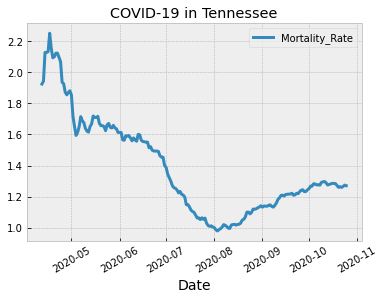

In [16]:
build_plots(tn_daily, 'Date', 'Mortality_Rate')

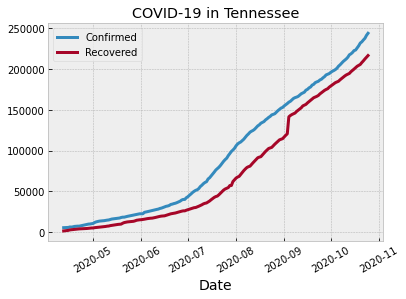

In [17]:
build_plots(tn_daily, 'Date', 'Confirmed', 'Recovered')

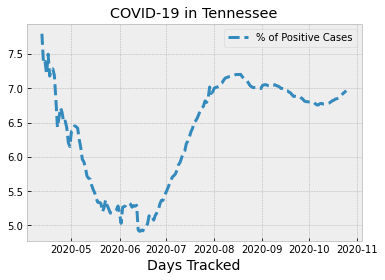

In [18]:
PctPos = (tn_daily['Confirmed'] / tn_daily['People_Tested']) * 100
plt.plot(tn_daily['Date'], PctPos, label='% of Positive Cases', 
         linewidth=3, linestyle='--')
plt.xlabel("Days Tracked", size=14)
plt.title("COVID-19 in Tennessee")
plt.legend()
plt.show()